## A lo largo de este proyecto vamos a cubrir cubrir los siguientes puntos:

- EDA preliminar.
- Transformación y limpieza de los datos.
- Análisis descriptivo de los datos.
- Visualización de los datos.
- Informe explicativo del análisis.


# EDA preliminar para saber que limpiar.

In [2]:
# Lo primero importar la libreria de PANDAS (Biblioteca de Python para el análisis y manipulaciónn de datos)
import pandas as pd
import numpy as np


In [3]:
#Leemos el archivo csv y lo convertimos a un DataFrame.
df_o = pd.read_csv(r'C:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\datos\bank_additional.csv',index_col=0)
df_o.sample(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
14441,56.0,management,MARRIED,university.degree,0.0,0.0,0.0,cellular,442,2,...,1.4,"93,918","-42,7","4,961","5228,1",no,17-mayo-2016,37.897,-70.629,746836c9-9fb6-464c-9276-7fd365477ea1
13245,NaN,admin.,SINGLE,university.degree,0.0,1.0,1.0,cellular,143,1,...,1.4,"93,918","-42,7","4,962","5228,1",no,18-enero-2017,24.659,-81.217,fbe139e6-22c7-4321-97aa-de5c0e775953


In [4]:
import os
print(os.getcwd())


c:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\archivos


In [5]:
import os

# Lista los archivos en la carpeta actual
print("Carpeta actual:", os.getcwd())
print("Contenido de la carpeta actual:")
print(os.listdir())

# Si ves la carpeta 'archivos', lista su contenido también
if 'archivos' in os.listdir():
    print("\nContenido de la carpeta 'archivos':")
    print(os.listdir('archivos'))


Carpeta actual: c:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\archivos
Contenido de la carpeta actual:
['bank_aditional.ipynb', 'customer_detail.ipynb', 'Pruebas.ipynb']


In [6]:
df_o = pd.read_csv(r'C:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\datos\bank_additional.csv',index_col=0)
df_o.sample(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
37866,NaN,self-employed,SINGLE,university.degree,0.0,1.0,0.0,cellular,102,2,...,-2.9,"92,201","-31,4","0,821","5076,2",no,11-noviembre-2017,27.383,-79.703,2f2e7a95-06dc-4a59-a85a-b95b7a1e41f7
11708,55.0,blue-collar,MARRIED,basic.4y,NaN,1.0,0.0,telephone,585,2,...,1.4,"94,465","-41,8","4,959","5228,1",yes,16-mayo-2017,28.132,-79.904,6368f7a7-2a94-4934-bcc4-f744fde21d41


In [7]:
#Hacemos una copia para evitar cambiar el archivo original y trabajaremos sobre ella.
df = df_o.copy()
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097


In [8]:
#Debido al tamaño del csv al hacer el head anterior vemos que no aparecen todas las columnas.
#Para que esto no ocurra utilizamos el siguiente método.

pd.set_option ('display.max_columns', None)
df.sample(3)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
15927,32.0,admin.,MARRIED,high.school,0.0,1.0,0.0,cellular,67,2,999,0,NONEXISTENT,1.4,"93,918","-42,7",NaN,"5228,1",no,24-abril-2015,28.411,-73.934,c984395e-e700-4e83-acd5-36cc43fd836d
31630,60.0,admin.,SINGLE,university.degree,0.0,1.0,1.0,cellular,107,1,999,1,FAILURE,-1.8,"92,893","-46,2","1,327","5099,1",no,24-agosto-2019,30.119,-85.013,17bf541a-2214-4e5a-88c9-410efdfdb23a
38316,74.0,retired,MARRIED,basic.9y,0.0,1.0,0.0,cellular,134,2,6,1,SUCCESS,-3.4,"92,431","-26,9","0,74","5017,5",yes,17-enero-2016,47.655,-76.406,24796ed5-713f-496c-9bbb-f2c9072dcab1


In [9]:
#Vemos que tipo de columnas tenemos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [10]:
#Otra manera de verlo seria:
df.dtypes

age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dtype: object

In [11]:
df.isnull().sum() #asi se pueden ver si tienen nulos pero no sabemos cuanto representan en la totalidad del DATA FRAME.

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [12]:
#Nos interesaria saber más el % de nulos ya que dependiendo de ello trabajariamos de una forma u otra.
round (df.isnull().mean()*100,2)

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
contact            0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     1.10
cons.conf.idx      0.00
euribor3m         21.53
nr.employed        0.00
y                  0.00
date               0.58
latitude           0.00
longitude          0.00
id_                0.00
dtype: float64

In [13]:
#Miremos ahora si tiene duplicados.
df.duplicated().sum()

#No tiene duplicados (np.inte64 = 0)

np.int64(0)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
default,34019.0,0.000088,0.009390,0.000,0.00000,0.0000,0.00000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.00000,1.0000,1.00000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.00000,0.0000,0.00000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


In [15]:
df.describe(include='O').T

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
cons.price.idx,42529,26,"93,994",7938
cons.conf.idx,43000,26,"-36,4",8020
euribor3m,33744,309,"4,857",2287
nr.employed,43000,11,"5228,1",16980
y,43000,2,no,38156


In [16]:
df.value_counts('education')

education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

In [17]:
for col in df.select_dtypes(include ='O').columns:
    print (col.upper())
    print (df[col].value_counts())
    print ('---------------------')

#así podemos ver los valores únicos de cada columna

JOB
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64
---------------------
MARITAL
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64
---------------------
EDUCATION
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64
---------------------
CONTACT
contact
cellular     27396
telephone    15604
Name: count, dtype: int64
---------------------
POUTCOME
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64
---------------------
CONS.PRICE.IDX
cons.price.idx
93,994    7938
93,918    6937
92,893    5

## Conclusiones del EDA preliminar: Cosas a limpiar de DataFrame

- Años en float, ponerlo en int
- Mayusculas y minusculas
- Tenemos nulos
- Tenemos puntos y comas
- Latitud y longitud no aparece en el enunciado que nos han pasado.
- El Id es ilegible.
- Fechas raras.

##### Columnas:
- **Age** ->  La edad del cliente. Pasarlo a int. Tiene un 11,91% nulos. OK
- **job** -> La ocupación o profesión del cliente. tiene un 0,80% de nulos. OK
- **Marital** ->  El estado civil del cliente.Pasarlo a minusculas.Tiene un 0,20% nulos. OK
- **education** ->  El nivel educativo del cliente. Cambiar el punto por un guion bajo. Tiene un 4,20% nulos. OK
- **Default** -> Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No)incumplimiento de pagos si o no. (0 o 1). Pasarlo de float a object con si o no.Tiene un 0,20,89% nulos. OK
- **housing** -> Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).
pasarlo a si o no. Tiene un 2,39% nulos. OK
- **loan** -> Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No). pasarlo a si o no. Tiene un 2,39% nulos.OK
- **contact** ->  El método de contacto utilizado para comunicarse con el cliente. Está todo ok por lo tanto no cambiar nada. OK
- **duration** -> La duración en segundos de la última interacción con el cliente. OK
- **campaign** -> El número de contactos realizados durante esta campaña para este cliente. OK
- **pdays** -> Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña. OK
- **previous** -> Número de veces que se ha contactado con el cliente antes de esta campaña. OK
- **poutcome** -> Resultado de la campaña de marketing anterior. Tiene un 4,20% de nulos. OK
- **emp.var.rate** -> La tasa de variación del empleo. Pasarlo a si o no. OK
- **cons.price.idx** ->  El índice de precios al consumidor.Tiene un 1,10% nulos OK
- **cons.confi.idx** -> El índice de confianza del consumidor. Todos los valores son negativos.¿es normal? OK
- **euribor3m** -> La tasa de interés de referencia a tres meses. Tiene un 21,53% nulos. OK
- **nr.employed** -> El número de empleados. Pasar de float a int???
- **y** -> Indica si el cliente ha suscrito un producto o servicio (Sí/No). pasar de object a bool o texto(si,no).OK
- **date** -> La fecha en la que se realizó la interacción con el cliente. pasar de object a fecha. Tiene un 0,58% nulos. OK
- **latitude y longitud** -> no aparecen definidas en el enunciado del ejercicio por lo que deberiamos eliminarlas. OK
- **id**-> Un identificador único para cada registro en el dataset. Pasar object a ....

# Transformación y la limpieza de los datos.

#### Eliminación de columnas.

In [18]:
#Eliminación de columnas que no tienen sentido porque no aparecen en el enunciado.
df = df.drop (['latitude','longitude'],axis=1)

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

#### Homogeneizar datos de la tabla.

In [20]:
df['education']=df['education'].str.replace ('.','_')
df.dtypes

age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
id_                object
dtype: object

In [21]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
2387,53.0,blue-collar,MARRIED,basic_9y,0.0,1.0,0.0,telephone,609,2,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,856",5191,no,17-febrero-2019,d3f52888-091b-429d-9200-824d7848e605


In [22]:
#Cambiamos el campo a tipo int pq no tiene sentido un float para edades. En este caso debido a que tiene NaN ponemos Int64 pq 
#sino no funcionaria con int64.
df['age'] = df['age'].round().astype('Int64')
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
21702,30,admin.,SINGLE,professional_course,0.0,0.0,0.0,cellular,97,7,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,963","5228,1",no,8-junio-2018,402dd6cf-3996-4e14-8011-0837a53ff4e9


In [23]:
df.dtypes

age                 Int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
id_                object
dtype: object

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

In [25]:
#Revisamos todas las columnas y en este caso las pasamos de mayúsculas a minúsculas.
for col in df.select_dtypes(include='O').columns:
    df[col]=df[col].str.lower()

In [26]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097


#### Pasar datos a fecha (Utilizar la libreria DateTime)

In [27]:
df.info() #si nos fijamos el tipo de la columna date es object y nosotros queremos pasarla a fecha.

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  Int64  
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [28]:
df.sample() #verificamos la columna date

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
33176,48,blue-collar,married,basic_9y,0.0,1.0,1.0,cellular,64,4,999,1,failure,-1.8,"92,893","-46,2","1,291","5099,1",no,23-enero-2017,078a73e8-0e59-4336-b481-ba68ea83841b


In [29]:
#debemos pues crear una libreria y cambiar dichos valores como enero a 01.

meses = {
    'enero':'01',
    'febrero':'02',
    'marzo' :'03',
    'abril' :'04',
    'mayo':'05',
    'junio':'06',
    'julio':'07',
    'agosto':'08',
    'septiembre':'09',
    'octubre':'10',
    'noviembre':'11',
    'diciembre':'12'
}

In [30]:
#con este código cambiamos la columna date pero solo lo visualizamos.
df= df.replace({'date':meses},regex=True)
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-08-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-09-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,married,high_school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,15-02-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,married,basic_6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-11-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,married,high_school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-01-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,<NA>,admin.,married,university_degree,0.0,0.0,0.0,cellular,618,2,999,0,nonexistent,1.4,"93,444","-36,1",NaN,"5228,1",yes,13-10-2015,4eed05de-2a98-4227-b488-32122009b638
26206,34,technician,married,professional_course,0.0,1.0,1.0,cellular,42,7,999,0,nonexistent,-0.1,"93,2",-42,NaN,"5195,8",no,17-03-2018,0f0aca88-4088-4fe2-905f-44fb675d9493
15046,<NA>,blue-collar,single,basic_6y,0.0,1.0,0.0,cellular,391,2,999,0,nonexistent,1.4,"93,918","-42,7",NaN,"5228,1",no,15-09-2016,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
15280,<NA>,admin.,married,university_degree,NaN,0.0,0.0,cellular,674,3,999,0,nonexistent,1.4,"93,918","-42,7","4,958","5228,1",no,23-09-2019,5f432048-d515-4bb5-9c94-62db451f88d4


In [31]:
#para guardar los cambios hariamos lo siguiente.
df.replace({'date':meses},regex=True, inplace=True)

In [32]:
#volvemos a lanzar el código anterior de datetime para pasar ahora si el valor a fecha.
pd.to_datetime(df['date'], format = '%d-%m-%Y')

0       2019-08-02
1       2016-09-14
2       2019-02-15
3       2015-11-29
4       2017-01-29
           ...    
19154   2015-10-13
26206   2018-03-17
15046   2016-09-15
15280   2019-09-23
27570   2019-11-06
Name: date, Length: 43000, dtype: datetime64[ns]

In [33]:
#el código funciona pero si nos devuelve algo es que no esta cambiado todavia.
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y')

In [34]:
#ahora si ejecutado el codigo y mirando en info podemos ver que hemos cambiado el dato a fecha.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             42655 non-null  object        
 2   marital         42915 non-null  object        
 3   education       41193 non-null  object        
 4   default         34019 non-null  float64       
 5   housing         41974 non-null  float64       
 6   loan            41974 non-null  float64       
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  object        
 15  cons.co

#### Cambiar las comas de los valores númericos por puntos. (En python los decimales van con puntos)

In [35]:
#Revisamos todas las columnas OBJECT y cambiamos las comas por puntos
for col in df.select_dtypes(include='O').columns:
    df[col]=df[col].str.replace (',','.')
    try:
        df[col]=df[col].astype(float)
    except:
        pass

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             42655 non-null  object        
 2   marital         42915 non-null  object        
 3   education       41193 non-null  object        
 4   default         34019 non-null  float64       
 5   housing         41974 non-null  float64       
 6   loan            41974 non-null  float64       
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  float64       
 15  cons.co

In [37]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
30966,26,management,single,university_degree,0.0,0.0,0.0,cellular,279,2,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no,2019-11-15,df10779d-bccb-4f2b-ad68-aebb2e740d52


#### Cambiar tipos de datos

In [38]:
df['nr.employed'] = df['nr.employed'].round().astype('int64')#Hacemos el cambio ahora pq previamente teniamos que pasar el campo de object a float y ahora a int.
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
28999,35,blue-collar,married,NaN,0.0,0.0,0.0,cellular,172,1,999,0,nonexistent,-1.8,93.075,-47.1,NaN,5099,no,2017-05-08,3608279f-c98a-4df6-8a56-3edaccd46b74


In [39]:
df.dtypes

age                        Int64
job                       object
marital                   object
education                 object
default                  float64
housing                  float64
loan                     float64
contact                   object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed                int64
y                         object
date              datetime64[ns]
id_                       object
dtype: object

In [40]:
dicc_loan = {1:'yes',
             0:'no'}

In [41]:
df['loan']= df['loan'].map(dicc_loan)

In [42]:
df['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [43]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
15711,35,self-employed,divorced,basic_9y,0.0,0.0,no,cellular,53,6,999,0,nonexistent,1.4,93.918,-42.7,4.96,5228,no,2016-12-27,017ad948-157b-4394-a934-a6a1883f4f15


In [44]:
dicc_housing={1:'yes',
              0:'no'}

In [45]:
df['housing']= df['housing'].map(dicc_housing)

In [46]:
df['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [47]:
dicc_default = {1:'yes',
              0:'no'}

In [48]:
df['default']= df['default'].map(dicc_default)

In [49]:
df['default'].unique()

array(['no', nan, 'yes'], dtype=object)

In [50]:
#terminada la limpieza verificamos el resultado final.
#podriamos hacer el id más legible pero no encuntro una manera que no me genere posibles problemas.
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,NaN,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             42655 non-null  object        
 2   marital         42915 non-null  object        
 3   education       41193 non-null  object        
 4   default         34019 non-null  object        
 5   housing         41974 non-null  object        
 6   loan            41974 non-null  object        
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  float64       
 15  cons.co

# Gestión de Nulos

## Visualizar cuantos nulos tenemos en %

In [52]:
#Visualizamos la cantidad de nulos que tenemos en las columnas.
df.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
id_                  0
dtype: int64

In [53]:
len(df)

43000

In [54]:
#Cálculo de valores en %
(df.isnull().sum()/df.shape[0]*100).round(2)

#también podriamos hacer el cálculo con len(df): 'df.isnull().sum()/len(df)'

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
contact            0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     1.10
cons.conf.idx      0.00
euribor3m         21.53
nr.employed        0.00
y                  0.00
date               0.58
id_                0.00
dtype: float64

In [55]:
# Nuevo dataframe para ver únicamente los nulos
nulos = df.isnull().sum()/df.shape[0]*100
nulos#esto todavia no seria un df sino una serie

age               11.906977
job                0.802326
marital            0.197674
education          4.202326
default           20.886047
housing            2.386047
loan               2.386047
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.095349
cons.conf.idx      0.000000
euribor3m         21.525581
nr.employed        0.000000
y                  0.000000
date               0.576744
id_                0.000000
dtype: float64

In [56]:
nulos>0

age                True
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx     True
cons.conf.idx     False
euribor3m          True
nr.employed       False
y                 False
date               True
id_               False
dtype: bool

In [57]:
#Convertimos la serie en un DataFrame
df_nulos = pd.DataFrame(nulos,columns=['porcentaje_nulos'])
df_nulos.round(2)

,porcentaje_nulos
age,11.91
job,0.80
marital,0.20
education,4.20
default,20.89
housing,2.39
loan,2.39
contact,0.00
duration,0.00
campaign,0.00


In [58]:
#Para hacerlo visualmente más legible vamos a quitar las columnas que no tengan nulos.T
df_nulos = pd.DataFrame(nulos,columns=['porcentaje_nulos'])
filtro = df_nulos['porcentaje_nulos']>0
df_nulos[filtro].round(2).sort_values(by='porcentaje_nulos',ascending=False)

#con esto tenemos una visión clara de cuantos números tenemos en este df_nulos.

,porcentaje_nulos
euribor3m,21.53
default,20.89
age,11.91
education,4.20
loan,2.39
housing,2.39
cons.price.idx,1.10
job,0.80
date,0.58
marital,0.20


---

## Distinguir entre columnas categóricas y númericas.

In [59]:
#los nulos de las columnas categoricas y las númericas se tratan de manera diferente.
#Por ello vamos a analizarlos de forma separada.
#método que nos dice si hay nulos. Otra forma diferente a la anterior.
df.columns[df.isnull().any()]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'cons.price.idx', 'euribor3m', 'date'],
      dtype='object')

### COLUMNAS CATEGORICAS

In [60]:
#Con esto vemos todas la columnas "df.columns" pero nosotros solo queremos las categóricas.

#COLUMNAS CATEGÓRICAS CON NULOS
df[df.columns[df.isnull().any()]].select_dtypes(include='O').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [61]:
df.shape
#hacemos un shape para darnos cuenta que de 21 columnas que teniamos pasamos a tener nulos en 6 columnas categoricas.

(43000, 21)

In [62]:
#Seleccionando las tipo Object como son variables categoricas no nos podria dar la media y lo que haria seria darnos
#otro tipo de cálculos 
#como el elemento más repetido en la columan (top)
df.describe(include='O').T

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,married,25999
education,41193,7,university_degree,12722
default,34019,2,no,34016
housing,41974,2,yes,22498
loan,41974,2,no,35442
contact,43000,2,cellular,27396
poutcome,43000,3,nonexistent,37103
y,43000,2,no,38156
id_,43000,43000,993bbbd6-4dbc-4a40-a408-f91f8462bee6,1


In [63]:
#Veamos solo las columnas categoricas que tengan nulos.T

col_cat_nulos =df[df.columns[df.isnull().any()]].select_dtypes(include='O').columns #lo guardamos en una variable
col_cat_nulos


Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [64]:
df_nulos = pd.DataFrame(nulos,columns=['porcentaje_nulos'])
filtro = df_nulos['porcentaje_nulos']>0
df_nulos[filtro].round(2).sort_values(by='porcentaje_nulos',ascending=False)

,porcentaje_nulos
euribor3m,21.53
default,20.89
age,11.91
education,4.20
loan,2.39
housing,2.39
cons.price.idx,1.10
job,0.80
date,0.58
marital,0.20


In [65]:
#A continuación vamos a verificar como son los valores que existen en cada una de esas columnas con nulos y ver si podemos
#estimar una relación y así poder rellenar más correctamente los nulos, aunque como siempre lo mejor sería hablar primeramente
#con el cliente para saber si nos pueden facilitar información de esos nulos o compartir con ellos la mejor opción para rellenar
#esos nulos.

In [66]:
df['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

In [67]:
df['marital'].value_counts()

marital
married     25999
single      12105
divorced     4811
Name: count, dtype: int64

In [68]:
df['education'].value_counts()

education
university_degree      12722
high_school             9925
basic_9y                6309
professional_course     5477
basic_4y                4356
basic_6y                2386
illiterate                18
Name: count, dtype: int64

In [69]:
df['default'].value_counts()

default
no     34016
yes        3
Name: count, dtype: int64

In [70]:
df['housing'].value_counts()

housing
yes    22498
no     19476
Name: count, dtype: int64

In [71]:
df['loan'].value_counts()

loan
no     35442
yes     6532
Name: count, dtype: int64

In [72]:
#Tras realizar el análisis sería muy arriesgado estimar un valor nosotros para rellear en los valores nulos por lo que decidimos
#rellenarlos con el termino "unknown" para facilitar el análisis posterior.

In [73]:
df['job']=df['job'].fillna('unknown')
df['marital']=df['marital'].fillna('unknown')
df['education']=df['education'].fillna('unknown')
df['default']=df['default'].fillna('unknown')
df['loan']= df['loan'].fillna('unknown')
df['housing']=df['housing'].fillna ('unknown')

In [74]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,married,high_school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,married,basic_6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,married,high_school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,<NA>,admin.,married,university_degree,no,no,no,cellular,618,2,999,0,nonexistent,1.4,93.444,-36.1,NaN,5228,yes,2015-10-13,4eed05de-2a98-4227-b488-32122009b638
26206,34,technician,married,professional_course,no,yes,yes,cellular,42,7,999,0,nonexistent,-0.1,93.200,-42.0,NaN,5196,no,2018-03-17,0f0aca88-4088-4fe2-905f-44fb675d9493
15046,<NA>,blue-collar,single,basic_6y,no,yes,no,cellular,391,2,999,0,nonexistent,1.4,93.918,-42.7,NaN,5228,no,2016-09-15,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
15280,<NA>,admin.,married,university_degree,unknown,no,no,cellular,674,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228,no,2019-09-23,5f432048-d515-4bb5-9c94-62db451f88d4


### COLUMNAS NUMÉRICAS

In [75]:
#Veamos solo las columnas numéricas que tengan nulos.T

col_num_nulos =df[df.columns[df.isnull().any()]].select_dtypes(include='number').columns #lo guardamos en una variable
col_num_nulos

Index(['age', 'cons.price.idx', 'euribor3m'], dtype='object')

In [76]:
#Antes de pasar a tomar decisiones sobre los nulos vamos a revisar con librerias de visualización los datos de las columnas
#numéricas y así poder tomar decisiones basadas más en la distribución real de los datos.

In [77]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df['date']=df['date'].fillna('unknown')

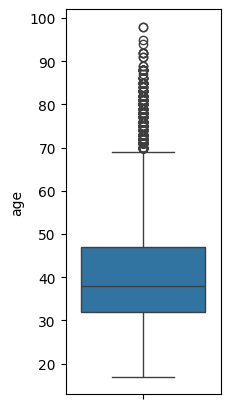

In [81]:
plt.figure(figsize=(2,5))
sns.boxplot(df['age'])
plt.show()
#Vemos que tiene muchos outliers. Valores muy alejados del resto de los valores, también llamados "valores atípicos".
#Por tanto deberiamos utilizar la mediana para tener un mejor análisis.
#Ademas vamos a utilizar la mediana ya que es un valor entero y concuerda más que la media en este caso para un campo 
#como "age"

In [82]:
#volvemos a revisar los datos de media y mediana.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.0,32.0,38.0,47.0,98.0
duration,43000.0,257.739279,258.666033,0.0,102.0,179.0,319.0,4918.0
campaign,43000.0,2.567233,2.772294,1.0,1.0,2.0,3.0,56.0
pdays,43000.0,962.330953,187.260394,0.0,999.0,999.0,999.0,999.0
previous,43000.0,0.174023,0.497366,0.0,0.0,0.0,0.0,7.0
emp.var.rate,43000.0,0.077128,1.573898,-3.4,-1.8,1.1,1.4,1.4
cons.price.idx,42529.0,93.574219,0.579548,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.8,-42.7,-41.8,-36.4,-26.9
euribor3m,33744.0,3.616521,1.737117,0.634,1.344,4.857,4.961,5.045
nr.employed,43000.0,5166.835721,72.337206,4964.0,5099.0,5191.0,5228.0,5228.0


In [83]:
#como el valor de los nulos es muy elevado un 11,91% tenemos que tener mucho cuidado con la decisión que tomemos en este caso
#a la hora de sustituir los nulos para no desvirtuar la muestra. A falta de información por el cliente y tras nuestro análisis
#decidimos sustituirlos por la media.
mediana_age = df ['age'].median()
df['age'].fillna(mediana_age)
df['age'] = df['age'].fillna(mediana_age)

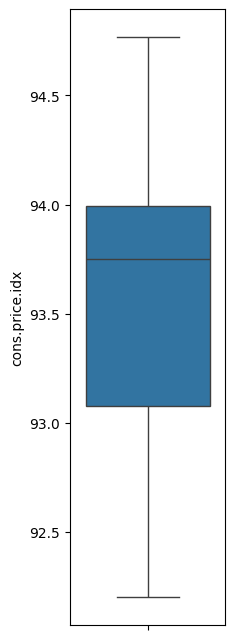

In [84]:
#verificamos ahora el indice de precios al consumidor "cons.price.idx"
plt.figure(figsize=(2,8))
sns.boxplot(df['cons.price.idx'])
plt.show()
#verificamos que en este caso no tiene "outliers".
#en este caso verificamo con el describe y la visualización que no hay mucha diferencia entre la media y la mediana, 
#por lo que decidimos sustituir los nulos por la media.

In [85]:
#en este caso el valor de nulos no es muy grande un 1,10% por lo que nuestros cambios no cambiarán significativamente el valor
#final, aun así siempre es recomendable verlo con el cliente antes si fuera posible.
media_cons_price_idx = df ['cons.price.idx'].mean()
df['cons.price.idx'].fillna(media_cons_price_idx)
df['cons.price.idx'] = df['cons.price.idx'].fillna(media_cons_price_idx)

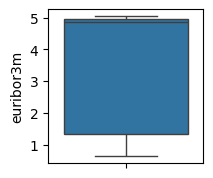

In [86]:
#verificamos el campo "euribor3m". 
plt.figure(figsize=(2,2))
sns.boxplot(df['euribor3m'])
plt.show()
#valores bastante compactos, no hay grandes desviaciones con respecto al mínimo vy máximo valor, aunque se ve claramente
#que la mayoria de los valores están por debajo de la mediana.
#aunque en este caso cuidado porque el valor de nulos es muy alto (21,53%) por lo que una mala decisión podria modificar 
#significativamente el resultado final.

In [87]:
#Por lo tanto volvemos a decidir sustituir los nulos por el valor de media. 
media_euribor3m = df ['euribor3m'].mean()
df['euribor3m'].fillna(media_euribor3m)
df['euribor3m'] = df['euribor3m'].fillna(media_euribor3m)

### Confirmación de 0 nulos

In [88]:
#Confirmación de eliminación de todos los nulos.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
date              0
id_               0
dtype: int64

In [89]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,38,housemaid,married,basic_4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857000,5191,no,2019-08-02 00:00:00,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,3.616521,5191,no,2016-09-14 00:00:00,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,married,high_school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857000,5191,no,2019-02-15 00:00:00,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,married,basic_6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,3.616521,5191,no,2015-11-29 00:00:00,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,married,high_school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,3.616521,5191,no,2017-01-29 00:00:00,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [90]:
df.dtypes

age                 Int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
date               object
id_                object
dtype: object

### Guardar archivo

In [91]:
#Guardamos un nuevo archivo ya tratado para trabajar con él.
df.to_csv(r'C:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\datos\bank_additional_sin_nulos.csv',index=False)

# Estadistica Descriptiva

In [92]:
df_o = pd.read_csv(r'C:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\datos\bank_additional_sin_nulos.csv')
#vamos a sacar conclusiones de este dataframe analizando mediante la estadistica descriptiva los resultados de las campos
#numéricos y categoricos existentes.

#A lo largo de esta sección iremos respondiendo a preguntas que la organización podría hacerse.

In [93]:
df = df_o.copy()
df.sample(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
10259,28,blue-collar,married,basic_6y,unknown,yes,no,telephone,273,5,999,0,nonexistent,1.4,94.465,-41.8,4.960000,5228,no,2018-04-11 00:00:00,71a2c49a-7f57-4601-899d-2f177bf765d3
37313,46,admin.,married,university_degree,no,yes,no,cellular,399,1,999,1,failure,-2.9,92.201,-31.4,3.616521,5076,yes,2017-12-27 00:00:00,a7ee3b6e-a06d-4d04-b24f-74590db02003


## Análisis de los datos numéricos

In [94]:
#Hacemos un describe para verificar los valores estadisticos que nos da esta función.
df.describe(include=np.number).T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.74,9.82,17.00,33.00,38.00,46.00,98.00
duration,43000.0,257.74,258.67,0.00,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.00,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.00,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,43000.0,93.57,0.58,92.20,93.08,93.57,93.99,94.77
cons.conf.idx,43000.0,-40.51,4.64,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,43000.0,3.62,1.54,0.63,1.47,4.08,4.96,5.04
nr.employed,43000.0,5166.84,72.34,4964.00,5099.00,5191.00,5228.00,5228.00


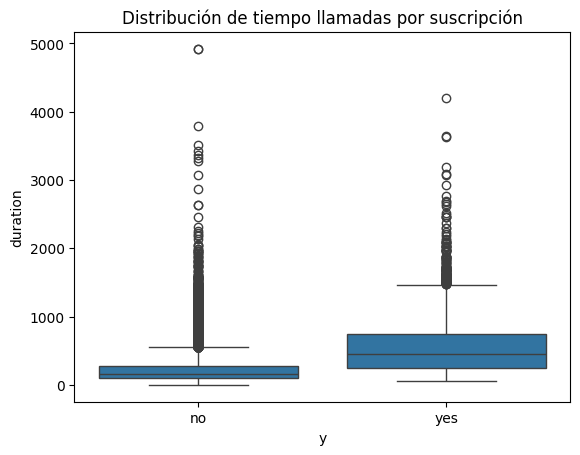

In [ ]:
sns.boxplot(data=df, x='y', y='duration')
plt.title('Distribución de tiempo llamadas por suscripción')
plt.show()

#como lo mediana del tiempo llamadas de yes es superior al no, podemos concluir que los clientes que se acaban suscribiendo
#tienen una duración de llamada mayor que los que no se suscriben. Aunque hay que tener en cuenta que las llamadas exitosas 
#no solo son más largas, sino también más variables en duración por eso la caja es más ancha.
#Muchos outlies en ambos casos, lo que indica que hay clientes que han recibido llamadas muy largas y otros muy cortas.


#Conclusión general del boxplot:El gráfico muestra una clara asociación entre mayor duración de la llamada y mayor 
#probabilidad de suscripción. Los clientes que aceptan la oferta ('yes') generalmente permanecen más tiempo en la llamada. 
#Esto sugiere que la duración puede ser un factor importante a monitorear o potenciar durante las campañas.

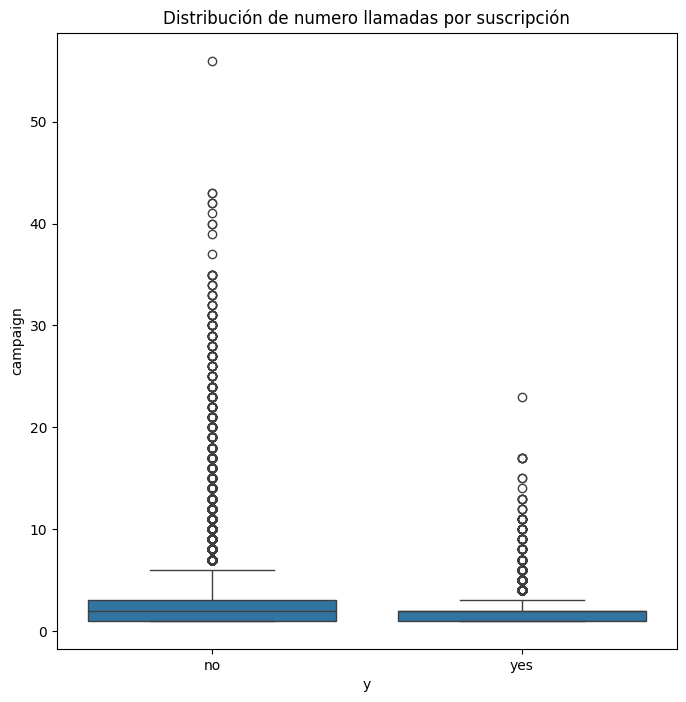

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='y', y='campaign')
plt.title('Distribución de numero llamadas por suscripción')
plt.show()

#

<Axes: xlabel='y', ylabel='campaign'>

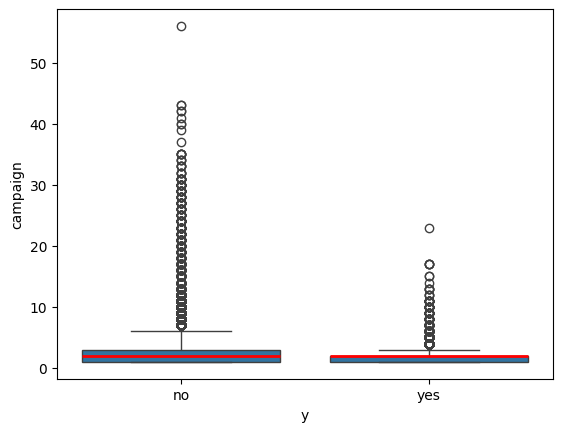

In [ ]:
sns.boxplot(data=df, x='y', y='campaign', medianprops={'color': 'red', 'linewidth': 2})
#marcamos las medianas en rojo para diferenciarlas mejor.

#Comprobamos que ambas son iguales, por lo tanto podemos concluir que en promedio, ambos grupos fueron contactados 
#el mismo número de veces antes de decidir.

#Las personas que no se suscribieron fueron contactadas en un rango más amplio de veces.
#Los que sí se suscribieron lo hicieron generalmente después de pocas llamadas y con menos variabilidad.

#Puedes ver outliers en ambos grupos, especialmente en 'no', con campañas que llegaron a contactar hasta 56 veces.
#Contactar muchas veces no garantiza conversión.Es probable que insistir más allá de cierto punto sea contraproducente.

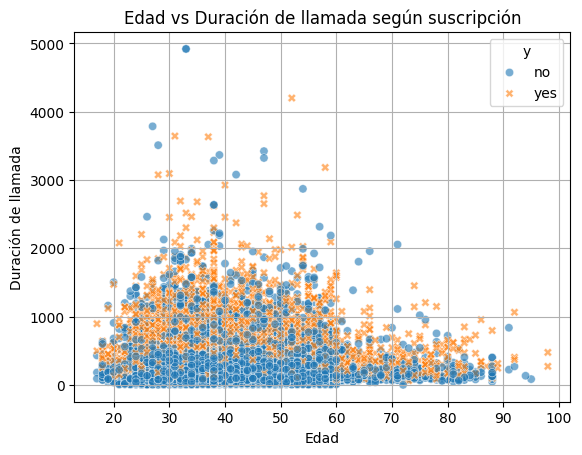

In [ ]:
sns.scatterplot(
    data=df,
    x='age',           # variable numérica 1
    y='duration',      # variable numérica 2
    hue='y',           # variable categórica (por ejemplo: 'yes' / 'no')
    style='y',         # opcional: cambiar también la forma de los puntos
    alpha=0.6
)

plt.title('Edad vs Duración de llamada según suscripción')
plt.xlabel('Edad')
plt.ylabel('Duración de llamada')
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

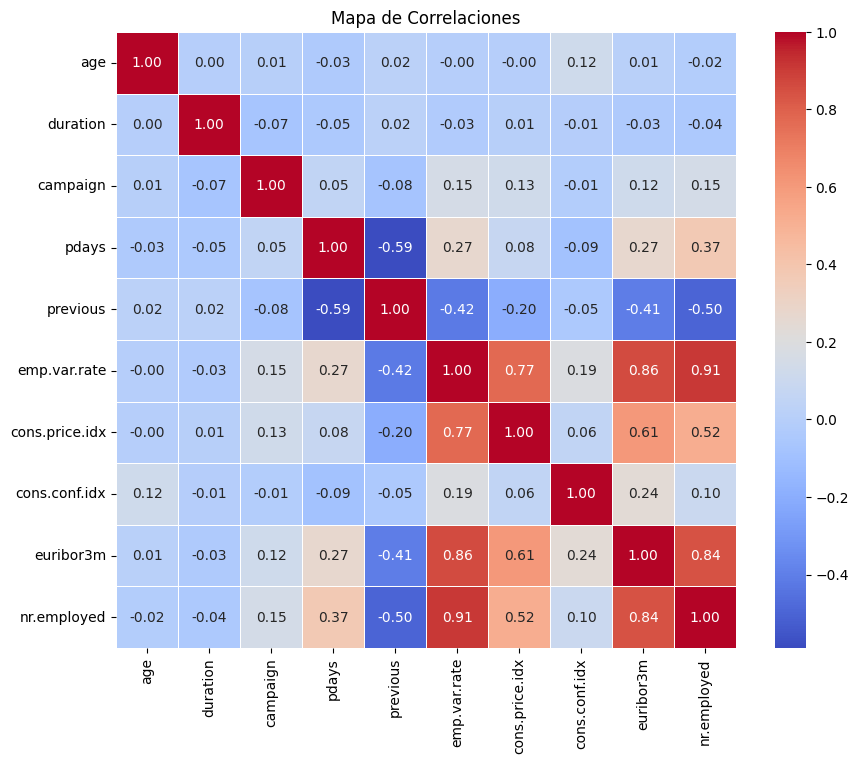

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()


In [106]:
#Como no podemos relacioinar la "y" con las demas variables vamos a hacer una conversión.
#Transformamos 'yes' y 'no' a 1 y 0:

df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})


In [107]:
# Generamos el nuevo numeric_df e Incluimos ahora y_encoded:
numeric_df = df.select_dtypes(include=['number'])  # ya incluirá y_encoded


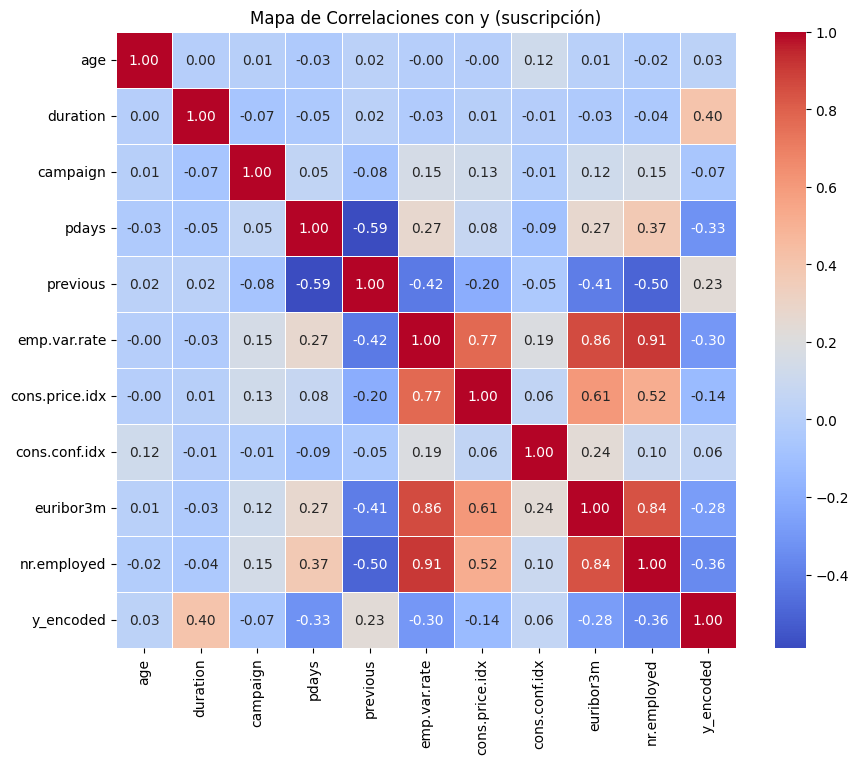

In [109]:
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones con y (suscripción)')
plt.show()

#Ahora podemos sacar conclusiones de las correlaciones:
#duration  --> Las llamadas más largas se asocian con suscripción
#pdays negativa --> Clientes contactados recientemente son más propensos a suscribirse
#previous --> Más contactos previos = más probabilidad de suscripción
#emp.var.rate negativa --> En peores contextos laborales hubo más suscripciones
#euribor3m negativa -->	Tasas más bajas, más conversiones (época de crisis)


In [ ]:
df['age'].describe().T.round(2)
#aunque existen outliers en este caso podemos comprobar que no hay mucha diferencia entre la media y la mediana por lo que
#podriamos decir que son practicamente iguales.
#Para ser más exactos si quisieramos responder a la pregunta de ¿cual es la edad media de los clientes? En este caso sería: 38

count    43000.00
mean        39.74
std          9.82
min         17.00
25%         33.00
50%         38.00
75%         46.00
max         98.00
Name: age, dtype: float64

In [ ]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from scipy.stats import normaltest
stat, p = normaltest(df['age'])
print(f"D'Agostino: estadístico={stat:.4f}, p-valor={p:.4f}")
#no es normal

D'Agostino: estadístico=5745.3574, p-valor=0.0000


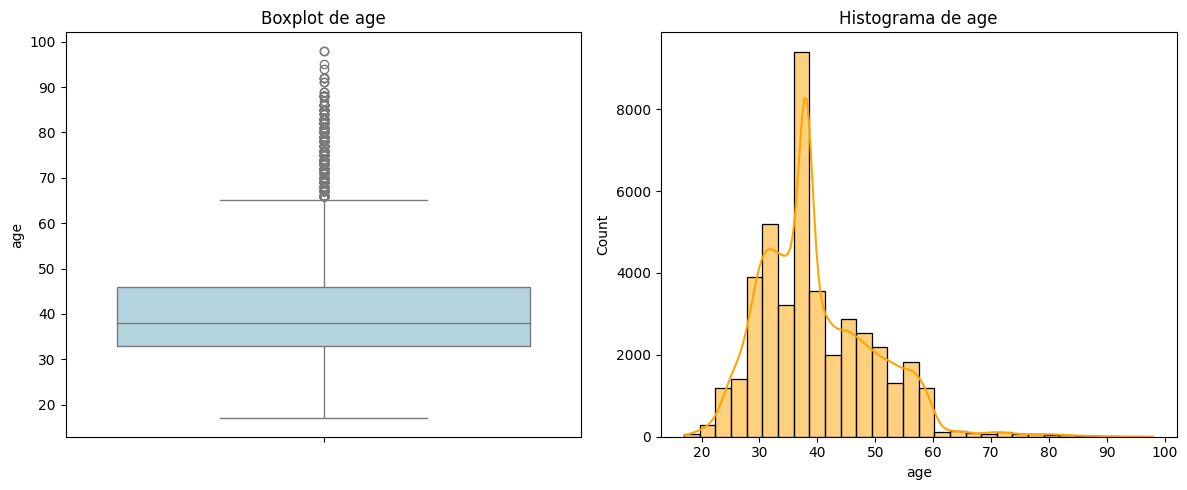

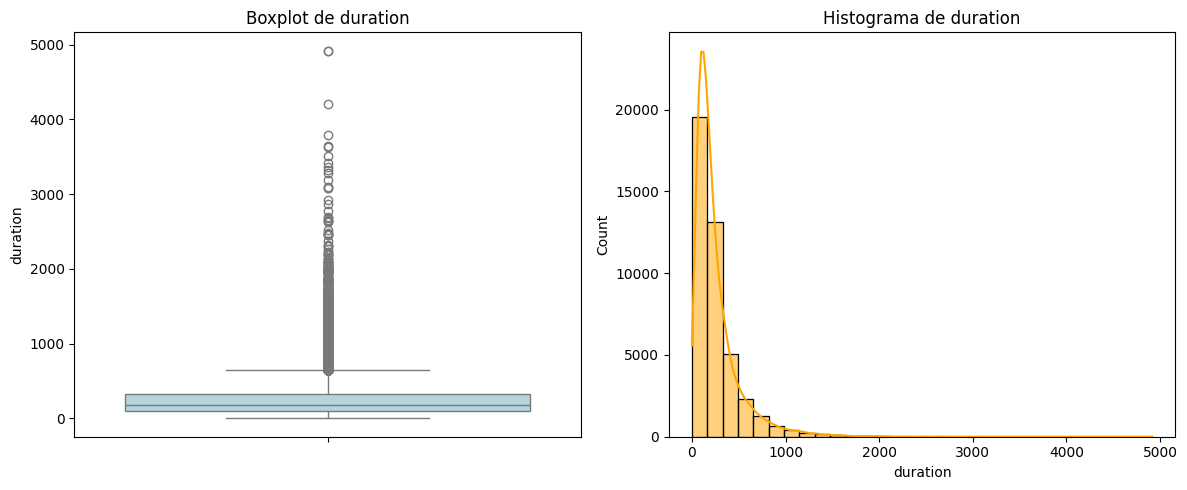

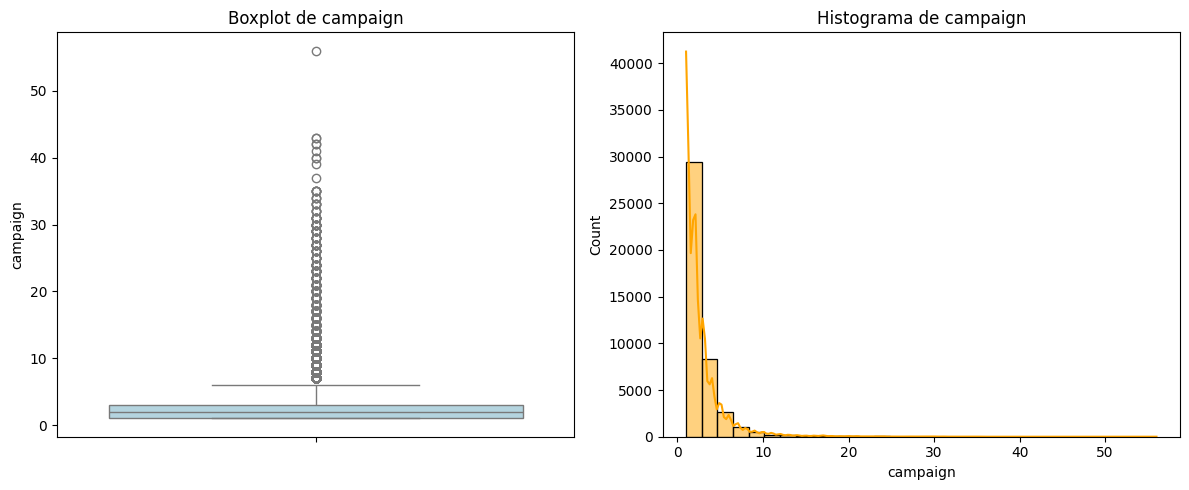

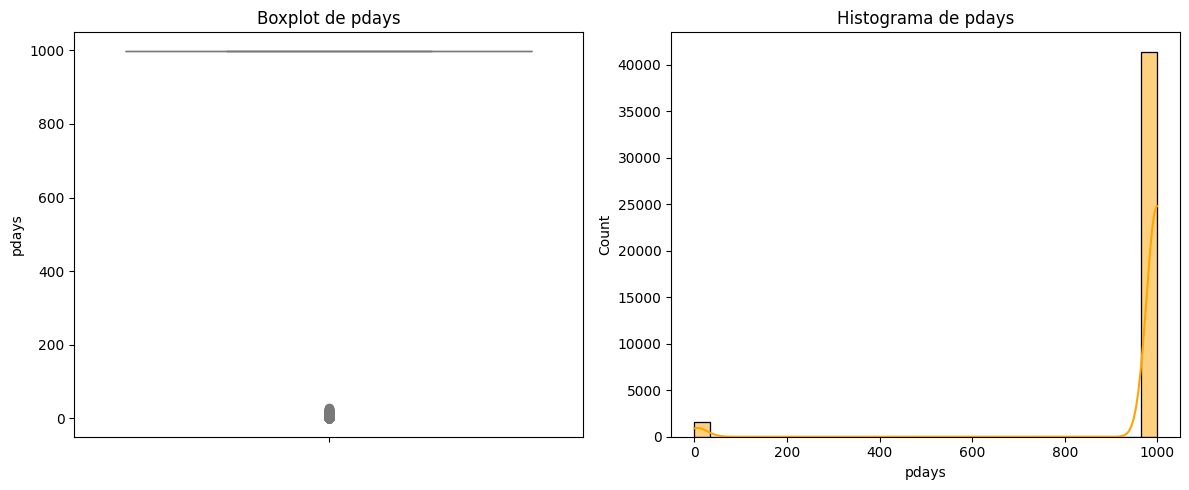

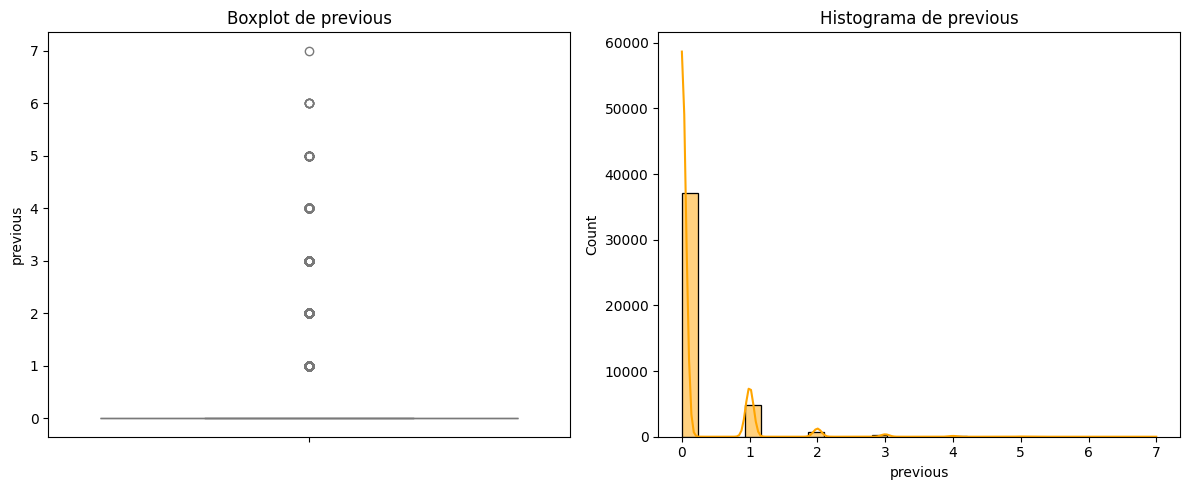

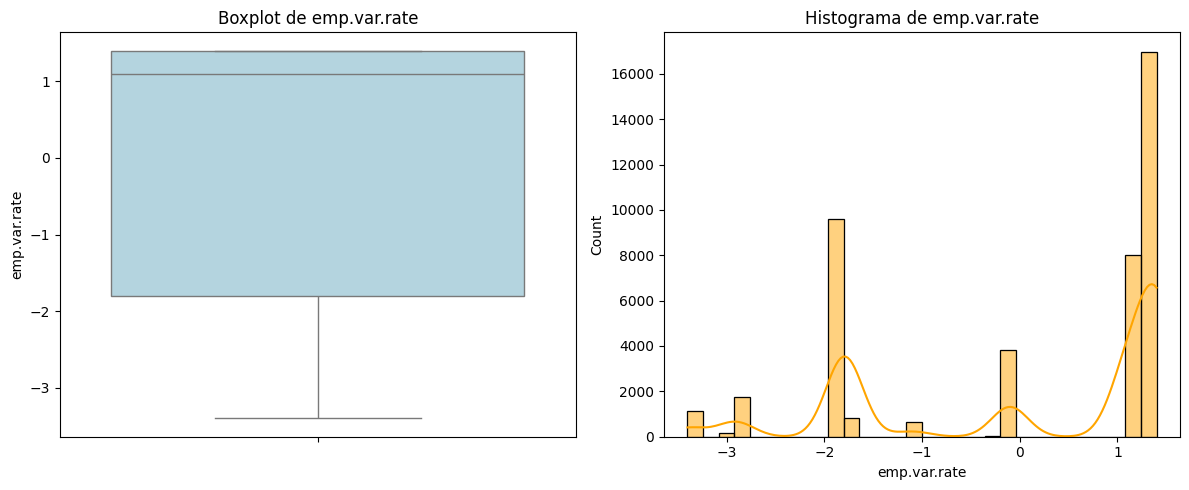

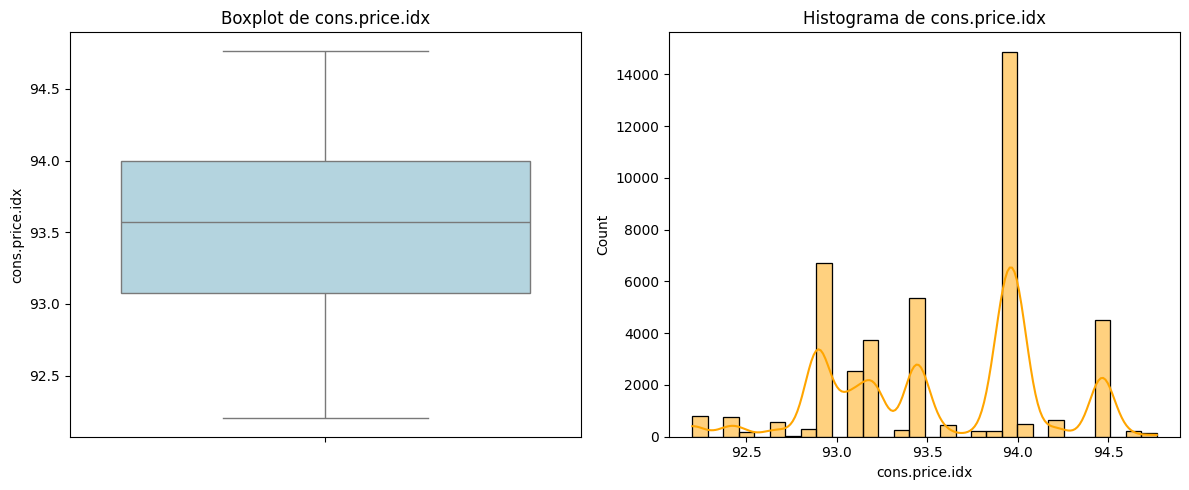

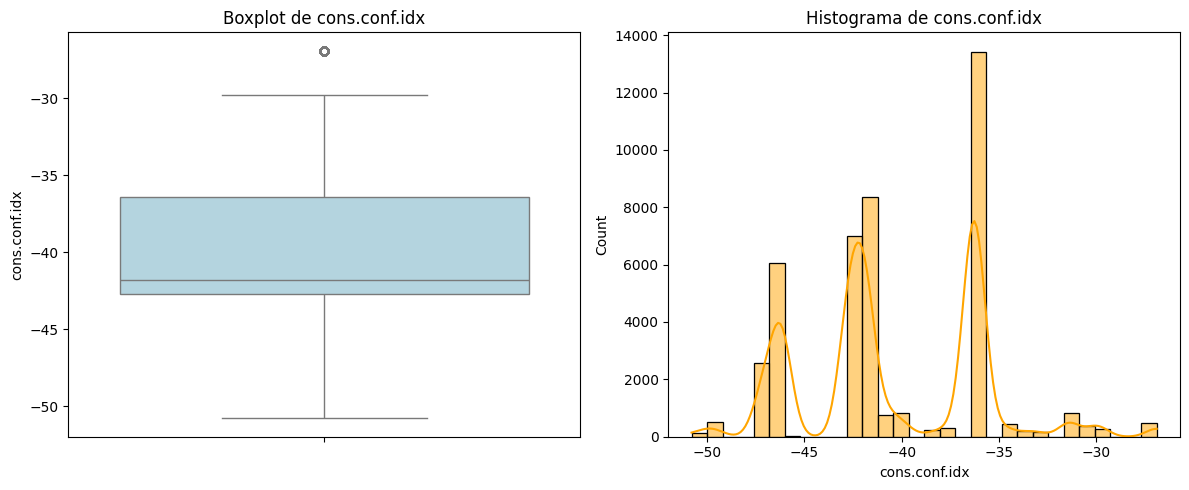

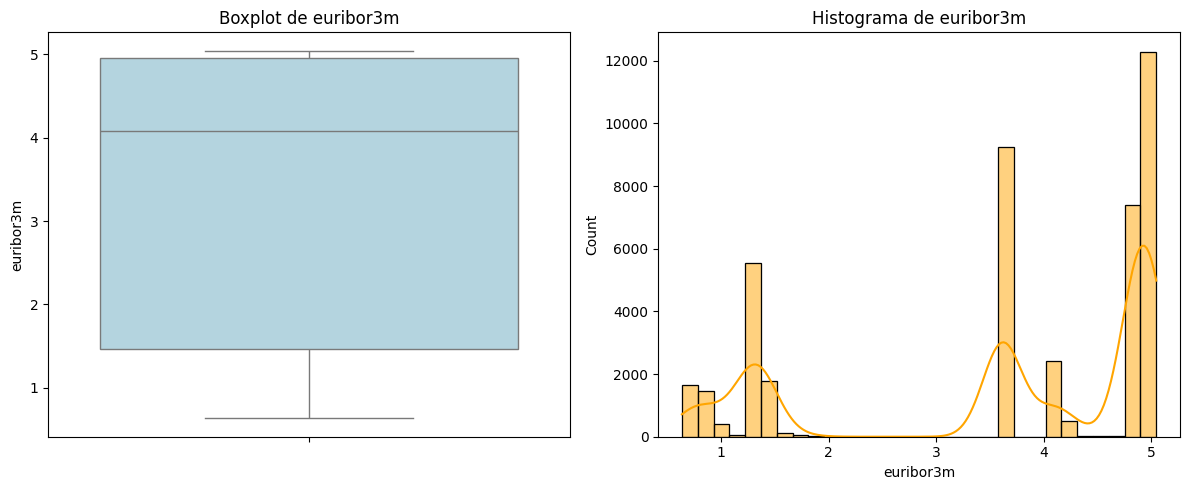

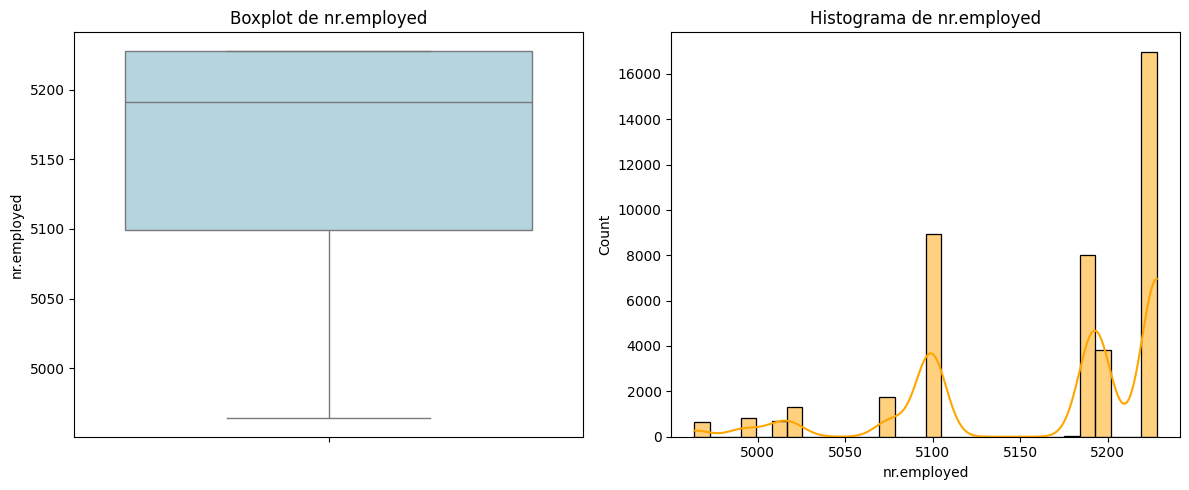

In [ ]:
# df = pd.read_csv('tus_datos.csv')

# Lista de columnas numéricas que quieres visualizar
columnas = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

# Bucle para graficar
for col in columnas:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot de {col}')

    # Histplot
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color='orange', bins=30)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()


## Análisis datos categoricos

In [ ]:
df_categoricas = df.select_dtypes(include=['object'])
df_categoricas.columns



Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'date', 'id_'],
      dtype='object')

In [ ]:
#Vamos a obtener la moda de todas las columnas categóricas y así poder saber cual es la categoria más repetida de cada una de 
#ellas, esto nos puede dar una información relevante para nuestras deducciones posteriores.
df.describe(include='O').T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,4,married,25999
education,43000,8,university_degree,12722
default,43000,3,no,34016
housing,43000,3,yes,22498
loan,43000,3,no,35442
contact,43000,2,cellular,27396
poutcome,43000,3,nonexistent,37103
y,43000,2,no,38156
date,43000,1826,unknown,248


In [ ]:
bins = [17, 25, 35, 45, 55, 65, 100]  # límites de los rangos
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


C:\Users\usuario\AppData\Local\Temp\ipykernel_11924\24833748.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightblue','orange'],ax=axs[0,1])


<Axes: xlabel='default'>

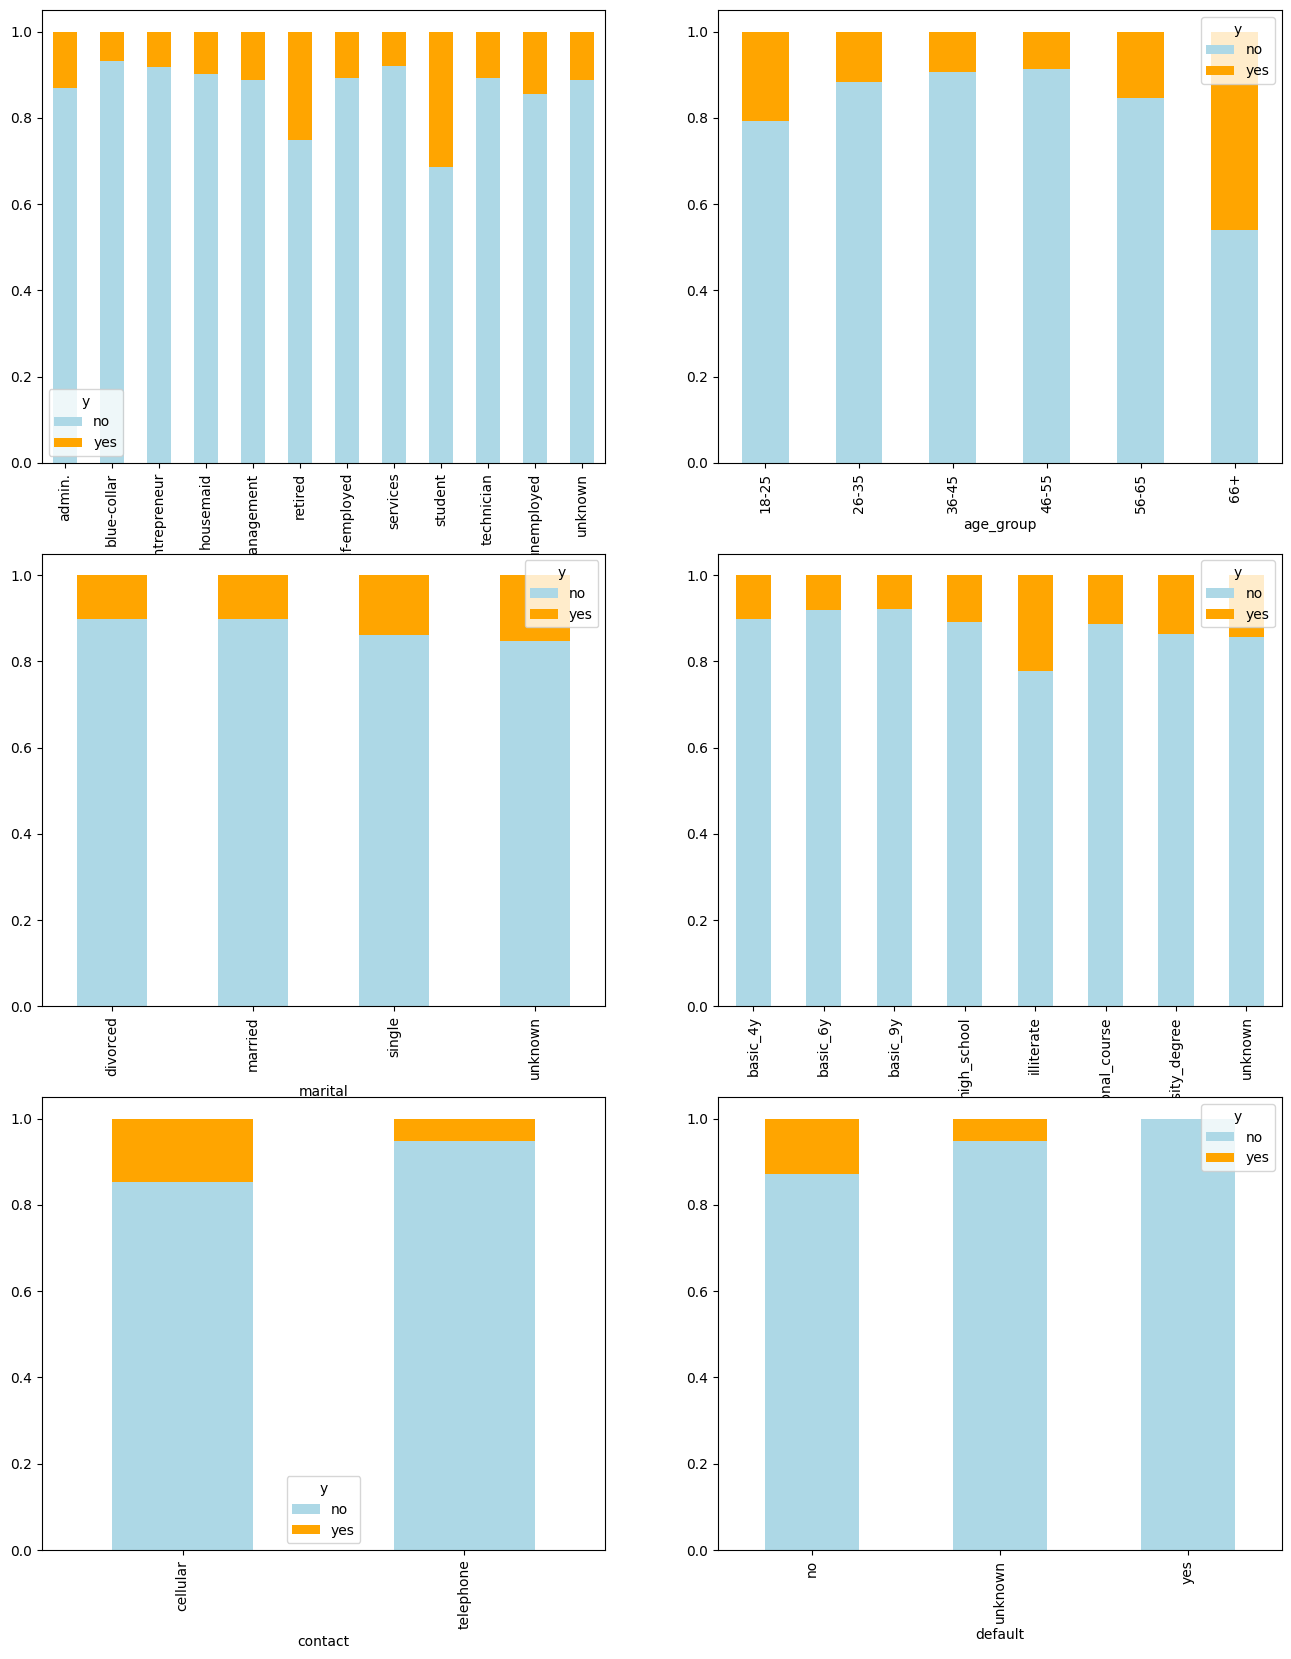

In [ ]:
# Por ejemplo: tasa de suscripción por ocupación
fig, axs = plt.subplots(3, 2, figsize=(16, 20))

df.groupby('job')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,color=['lightblue','orange'],ax=axs[0,0])
df.groupby('age_group')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightblue','orange'],ax=axs[0,1])
df.groupby('marital')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightblue','orange'],ax=axs[1,0])
df.groupby('education')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightblue','orange'],ax=axs[1,1])
df.groupby('contact')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightblue','orange'],ax=axs[2,0])
df.groupby('default')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightblue','orange'],ax=axs[2,1])
#Esto te muestra qué profesiones, niveles de educación, estado civil, etc., tienen mayor proporción de “yes”.

In [ ]:
df.groupby('y')[['age', 'duration', 'campaign']].mean().round(2)
#Esto te muestra, por ejemplo:

#¿Las personas que contratan son mayores?

#¿Recibieron menos llamadas?

#¿Sus llamadas duraron más?

,age,duration,campaign
y,,,
no,39.64,220.43,2.63
yes,40.54,551.62,2.05


<Axes: xlabel='age_group', ylabel='duration'>

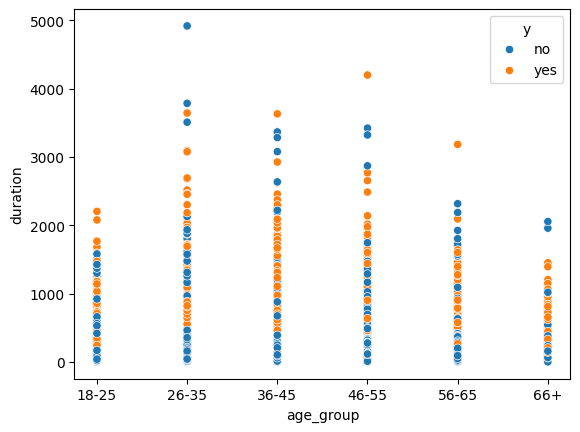

In [ ]:
# Buscar patrones multivariados (scatterplot)
sns.scatterplot(data=df, x='age_group', y='duration', hue='y')

#podrías ver que la mayoría de quienes aceptan son personas entre 30-50 años con llamadas largas.


# Informe explicativo

Las conclusiones generales del análisis se detallan a continuación. Para entender mejor el resumen de los datos vamos a 
separarlos en dos campos:
- Tipo de cliente que acaba realizando la suscripción.

- Que variables son las que afectan a la suscripción.

    - **Tipo de Cliente**:
        - El mayor número de clientes que acaban suscritos son aquellos que se encuentran entre los rangos de 18-25 años y los mayores de 66.
        - Por ocupación estos clientes son "Retired" y "Student".
        - En su gran mayoria "Singels".
        - Con un nivel de estudios "Illiterate"
        - Han sido contactados por "Celular"
        - No disponen de otros prestamos.

    - **Variables clave**:
        - Las llamadas más largas se asocian con suscripción.
        - Clientes contactados recientemente son más propensos a suscribirse.
        - Más contactos previos = más probabilidad de suscripción.
        - En peores contextos laborales (emp.var.rate negativa) hubo más suscripciones.
        - Tasas más bajas (euribor negativo), más conversiones (época de crisis)